In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.gridspec as gridspec
import pickle
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# website    https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/seaice_analysis/

df = pd.read_excel('../data/nsidc/Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx',
                   sheet_name='SH-Daily-Extent')


In [3]:
# df.drop(index=59,inplace=True)
df.drop(columns=['Unnamed: 0',
                 'Unnamed: 1',
                 ' ',
                 '1981-2010 mean',
                 '1981-2010 median'],
        inplace=True)

df[df.isnull()] = np.nan

# df.drop([59],inplace=True)

df

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,5.967,6.323,NaN,6.508,NaN,NaN,7.718,NaN,...,7.121,8.546,9.393,6.911,5.516,6.384,5.314,6.285,6.459,5.493
1,NaN,6.945,NaN,NaN,7.039,NaN,6.944,6.527,NaN,6.765,...,6.935,8.410,9.273,6.721,5.387,6.244,5.136,6.129,6.337,5.276
2,NaN,NaN,5.674,5.791,NaN,6.170,NaN,NaN,7.572,NaN,...,6.841,8.243,9.154,6.554,5.232,6.114,4.968,5.967,6.224,5.160
3,NaN,6.838,NaN,NaN,6.689,NaN,6.653,6.061,NaN,6.458,...,6.756,8.114,8.983,6.413,5.149,5.921,4.876,5.876,6.063,4.988
4,NaN,NaN,5.584,5.351,NaN,5.869,NaN,NaN,7.243,NaN,...,6.601,7.880,8.821,6.250,5.065,5.768,4.750,5.774,5.900,4.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,7.907,NaN,NaN,8.005,NaN,7.888,8.052,NaN,7.731,NaN,...,9.529,9.943,8.358,6.156,7.146,5.989,7.011,7.441,6.461,NaN
362,NaN,6.396,7.178,NaN,6.912,NaN,NaN,8.628,NaN,NaN,...,9.317,9.832,8.098,6.038,6.998,5.833,6.878,7.208,6.295,NaN
363,7.588,NaN,NaN,7.716,NaN,7.588,7.707,NaN,7.284,NaN,...,9.096,9.701,7.791,5.873,6.829,5.704,6.735,7.121,6.185,NaN
364,NaN,6.124,6.634,NaN,6.708,NaN,NaN,8.132,NaN,NaN,...,8.849,9.605,7.494,5.787,6.684,5.599,6.624,6.984,5.846,NaN


In [4]:
for col in df.columns:
#     print(col)
    if ~np.isnan(df[col].iloc[59]):
        pass
    else:
        timeseries = df[col].drop([59])
        
        df[col] = list(timeseries)+[np.nan]

(1.5, 10.0)

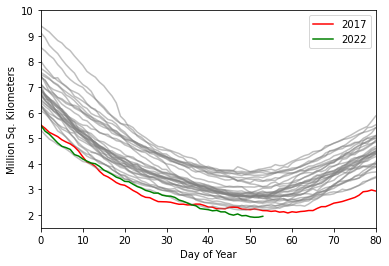

In [5]:
for col in df.columns:
    
    if col == 2017:
        color='r'
        alpha=1
        label=col
        
    elif col == 2022:
        color='g'
        alpha=1
        label=col
        
    else:
        color='gray'
        alpha=0.5
        label=None
    
    plt.plot(df.index,df[col],color=color,alpha=alpha,label=label)
    
plt.xlabel('Day of Year')
plt.ylabel('Million Sq. Kilometers')


plt.legend()
plt.xlim(0,80)
plt.ylim(1.5,10)

In [6]:
pickle.dump(df, open('../pickles/Antarctic_all.p','wb'))

In [7]:
dicts_list = []
for col in df.columns[1:-1]:
    
    dicts_list.append({
              'year':col,
              'doy_min':np.argmin(df[col]),
              'min':np.min(df[col]),
              'doy_max':np.argmax(df[col]),
              'max':np.max(df[col]),
             })
    
mmdf = pd.DataFrame(dicts_list)

mmdf['melt_duration'] = list( (365+mmdf['doy_min'].iloc[1:])-mmdf['doy_max'].iloc[:-1] )
mmdf['growth_duration'] = mmdf['doy_max']-mmdf['doy_min']

mmdf

,year,doy_min,min,doy_max,max,melt_duration,growth_duration
0,1979,47,2.911,255,18.361,NaN,208
1,1980,56,2.521,265,19.092,156.0,209
2,1981,50,2.694,260,18.856,155.0,210
3,1982,53,2.890,245,18.550,173.0,192
4,1983,54,2.843,262,18.811,157.0,208
5,1984,57,2.382,265,18.370,157.0,208
6,1985,49,2.602,253,18.931,161.0,204
7,1986,64,2.953,260,18.027,169.0,196
8,1987,51,3.010,257,18.524,159.0,206
9,1988,54,2.639,276,18.785,143.0,222


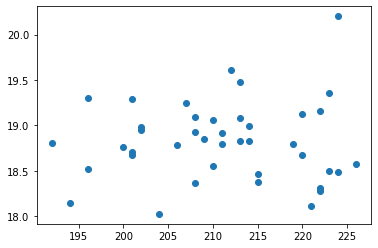

In [8]:
plt.scatter(mmdf['growth_duration'].iloc[:-1],mmdf['max'].iloc[1:])
# plt.scatter()

In [10]:
timeseries = []

for col in df.columns[:]:
    
    timeseries += list(df[col])
    
timeseries = np.array(timeseries)

timeseries[np.isnan(timeseries)] = np.nan

In [11]:
x = np.arange(len(timeseries))[~np.isnan(timeseries)]

y = timeseries[~np.isnan(timeseries)]

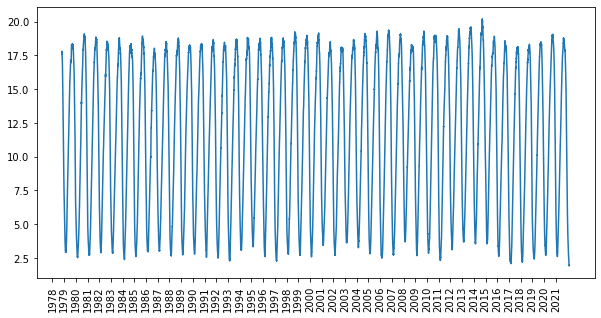

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(x,y)

ax.set_xticks(np.arange(0,366*44,366))
ax.set_xticklabels(np.arange(1978,2022),rotation=90)

# plt.plot(np.arange(300,350),timeseries[300:350],color='k')

plt.show()

LinregressResult(slope=-0.0001174770965468613, intercept=3.021490204369269, rvalue=-0.00351524641395314, pvalue=0.9819324251566037, stderr=0.005156679051216209, intercept_stderr=10.316144266532197)


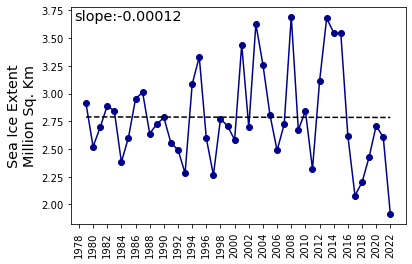

In [13]:
doy_mins = []
years = []
specials = []

for col in df.columns:
    
    doy_min = np.min(df[col])
    doy_mins.append(doy_min)
    years.append(int(col))
    
    if np.isin(int(col), [2017]):
        specials.append(doy_min)
    
years = years[1:]
doy_mins = doy_mins[1:]
    
plt.plot(years,doy_mins,marker='o',color='darkblue')
# plt.scatter([2017],specials,c=['r'],zorder=5,s=45)
plt.xticks(np.arange(1978,2023,2),rotation=90)
plt.ylabel('Sea Ice Extent\nMillion Sq. Km',fontsize='x-large')

lr = linregress(years,doy_mins)

print(lr)

slope = lr[0]

plt.annotate(f'slope:{round(slope,5)}',xy=(0.01,0.99),va='top',xycoords='axes fraction',fontsize='x-large')

plt.plot([1979,2022],[1979*lr[0]+lr[1],2022*lr[0]+lr[1]],color='k',ls='--')

plt.show()

/home/robbie/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/robbie/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/robbie/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


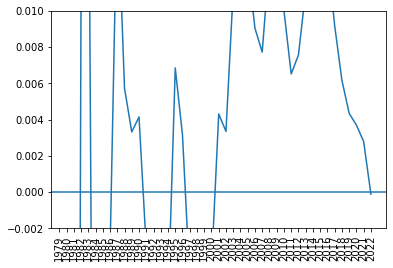

In [14]:
slopes = []

for i in range(1,len(years)+1):
    
    lr = linregress(years[0:i],doy_mins[0:i])
    slopes.append(lr[0])
    
plt.plot(years,slopes)
plt.ylim(-0.002,0.01)
plt.axhline(0)
plt.xticks(years,rotation=90)
plt.show()

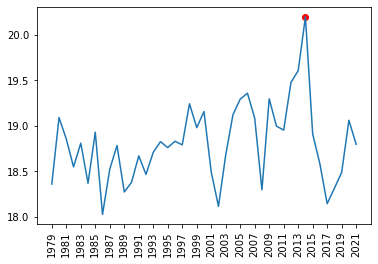

In [15]:
doy_maxs = []
years = []
max_specials = []

for col in df.columns:
    
    doy_max = np.max(df[col])
    doy_maxs.append(doy_max)
    years.append(int(col))
    
    if np.isin(int(col), [2014]):
        max_specials.append(doy_max)
    
years = years[1:-1]
doy_maxs = doy_maxs[1:-1]
    
plt.plot(years,doy_maxs)
plt.scatter([2014],max_specials,c=['r'])
plt.xticks(years[::2],rotation=90)
plt.show()

In [16]:
len(doy_mins)

np.std(doy_mins[1:21]), np.std(doy_mins[21:-1])

np.std(doy_mins[1:21])/np.mean(doy_mins[1:-1]), np.std(doy_mins[21:-1])/np.mean(doy_mins[1:-1])

(0.0929758875394186, 0.17663124184477633)

# Summary plot

ValueError: x and y must have same first dimension, but have shapes (43,) and (44,)

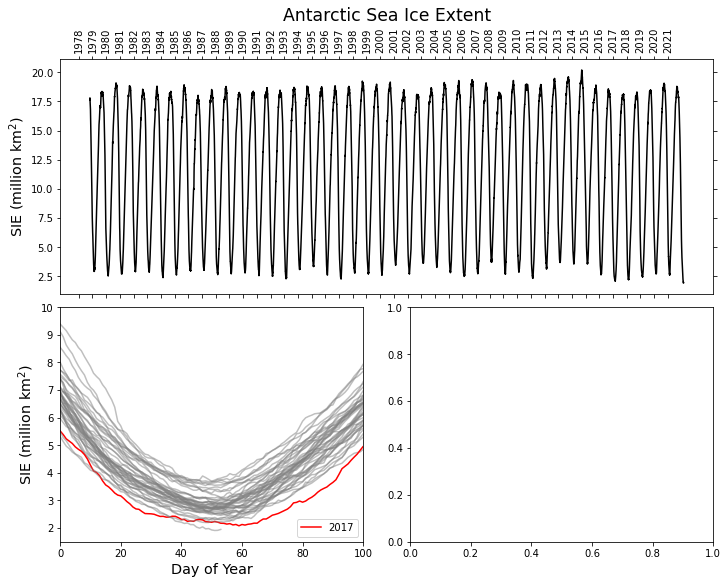

In [17]:
fig = plt.figure(constrained_layout=True,figsize=(10,8))

gs = fig.add_gridspec(2, 2)

top_ax = fig.add_subplot(gs[0, :])
top_ax.set_title('Antarctic Sea Ice Extent', fontsize='xx-large')

top_ax.plot(x,y,color='k')

top_ax.set_xticks(np.arange(0,366*44,366))
top_ax.set_xticklabels(np.arange(1978,2022),rotation=90)

top_ax.xaxis.set_label_position('top') 
top_ax.xaxis.tick_top()
top_ax.yaxis.set_ticks_position('both')
top_ax.xaxis.set_ticks_position('both')


top_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')


#####################################


BL_ax = fig.add_subplot(gs[1, :-1])

for col in df.columns:
    
    if col == 2017:
        color='r'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    BL_ax.plot(df.index[~np.isnan(df[col])],df[col][~np.isnan(df[col])],color=color,alpha=alpha)

BL_ax.set_xlim(0,100)
BL_ax.set_ylim(1.5,10)

BL_ax.set_xlabel('Day of Year', fontsize='x-large')
BL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2017],
                       ['r']):
    BL_ax.plot([],[],color=color,label=str(year))
BL_ax.legend(loc='lower right')

#####################################

BR_ax = fig.add_subplot(gs[1:, -1])

BR_ax.plot(years,doy_mins,color='k',marker='o')
BR_ax.scatter([2017],specials,c=['r'],zorder=5)

BR_ax.yaxis.set_label_position('right') 
BR_ax.yaxis.tick_right()

BR_ax.set_xlabel('Year', fontsize='x-large')
BR_ax.set_ylabel('Minimum SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2017],
                       ['r']):
    BR_ax.scatter([],[],color=color,label=str(year))
BR_ax.legend(loc='lower left')



ValueError: x and y must have same first dimension, but have shapes (43,) and (44,)

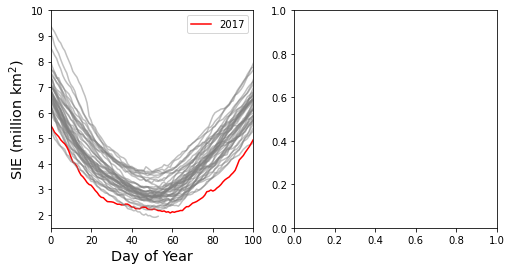

In [18]:
fig, (BL_ax,BR_ax) = plt.subplots(1,2,figsize=(8,4))

for col in df.columns:
    
    if col == 2017:
        color='r'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    BL_ax.plot(df.index[~np.isnan(df[col])],df[col][~np.isnan(df[col])],color=color,alpha=alpha)

BL_ax.set_xlim(0,100)
BL_ax.set_ylim(1.5,10)

BL_ax.set_xlabel('Day of Year', fontsize='x-large')
BL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2017],
                       ['r']):
    BL_ax.plot([],[],color=color,label=str(year))
BL_ax.legend(loc='upper right')

#####################################

BR_ax.plot(years,doy_mins,color='k',marker='o')
BR_ax.scatter([2017],specials,c=['r'],zorder=5)

BR_ax.yaxis.set_label_position('right') 
BR_ax.yaxis.tick_right()

BR_ax.set_xlabel('Year', fontsize='x-large')
BR_ax.set_ylabel('Minimum SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2017],
                       ['r']):
    BR_ax.scatter([],[],color=color,label=str(year))
BR_ax.legend(loc='upper left')

plt.subplots_adjust(wspace=0.05)

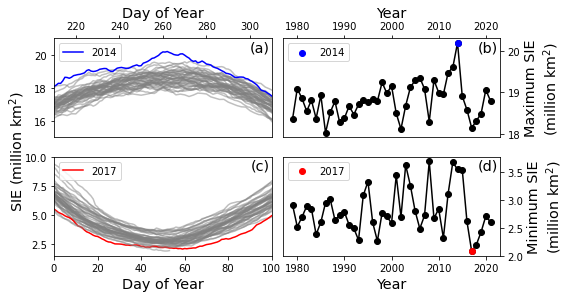

In [23]:
fig, axs = plt.subplots(2,2,figsize=(8,4))


for ax, letter in zip(axs.reshape(-1),string.ascii_letters):
    ax.annotate(f'({letter})',fontsize='x-large',xy=(0.99,0.98),
                va='top',ha='right',
                xycoords='axes fraction',
                 zorder=10)

UL_ax, UR_ax, BL_ax,BR_ax = axs.reshape(-1)

for col in df.columns:
    
    if col == 2014:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    UL_ax.plot(df.index[~np.isnan(df[col])],df[col][~np.isnan(df[col])],color=color,alpha=alpha)

UL_ax.set_xlim(210,310)
UL_ax.set_ylim(15,21)

UL_ax.set_xlabel('Day of Year', fontsize='x-large')
# UL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2014],
                       ['b']):
    UL_ax.plot([],[],color=color,label=str(year))
UL_ax.legend(loc='upper left')

UL_ax.xaxis.set_label_position('top') 
UL_ax.xaxis.tick_top()

#####################################


UR_ax.plot(years,doy_maxs,color='k',marker='o')
UR_ax.scatter([2014],max_specials,c=['b'],zorder=5)

UR_ax.yaxis.set_label_position('right') 
UR_ax.yaxis.tick_right()

UR_ax.set_xlabel('Year', fontsize='x-large')
UR_ax.set_ylabel('Maximum SIE\n(million km$^2$)', fontsize='x-large')

for year, color in zip([2014],
                       ['b']):
    UR_ax.scatter([],[],color=color,label=str(year))
UR_ax.legend(loc='upper left')

UR_ax.xaxis.set_label_position('top') 
UR_ax.xaxis.tick_top()

#####################################


for col in df.columns:
    
    if col == 2017:
        color='r'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    BL_ax.plot(df.index[~np.isnan(df[col])],df[col][~np.isnan(df[col])],color=color,alpha=alpha)

BL_ax.set_xlim(0,100)
BL_ax.set_ylim(1.5,10)

BL_ax.set_xlabel('Day of Year', fontsize='x-large')

# BL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2017],
                       ['r']):
    BL_ax.plot([],[],color=color,label=str(year))
BL_ax.legend(loc='upper left')

#####################################

BR_ax.plot(years,doy_mins[:-1],color='k',marker='o')
BR_ax.scatter([2017],specials,c=['r'],zorder=5)

BR_ax.yaxis.set_label_position('right') 
BR_ax.yaxis.tick_right()

BR_ax.set_xlabel('Year', fontsize='x-large')

BR_ax.set_ylabel('Minimum SIE\n(million km$^2$)', fontsize='x-large')

for year, color in zip([2017],
                       ['r']):
    BR_ax.scatter([],[],color=color,label=str(year))
BR_ax.legend(loc='upper left')

plt.subplots_adjust(wspace=0.05)

plt.annotate(text='SIE (million km$^2$)',
             fontsize='x-large',
             xycoords='axes fraction',
             xy=(-1.22,0.5),
             rotation=90,
             ha='center')

# plt.tight_layout()
data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'

plt.savefig(f"{data_dir}/fig_8_c.png",dpi=500, bbox_inches='tight')

plt.savefig('../figs/Antarctic_SIE.jpg',dpi=500)

In [27]:
np.nanstd(np.array(doy_maxs)[np.array(years)<2001]), np.nanstd(np.array(doy_maxs)[np.array(years)>=2001])

(0.29787545236888313, 0.51430638847334)

In [21]:
np.nanmin(doy_maxs)

18.027

In [22]:
np.nanmax(doy_mins)

3.692

In [21]:
import pickle
pickle.dump((years,doy_mins), open('../pickles/Antarctic_mins.p','wb'))
pickle.dump((years,doy_maxs), open('../pickles/Antarctic_maxs.p','wb'))